In [2]:
## Making simple model with stan
setwd("G:\\My Drive\\stan_practice\\seaice.csv")

In [5]:
seaice <- read.csv("seaice2.csv", stringsAsFactors = F)
head(seaice)

Date,Value,Anomaly
1979,8.04,0.84
1980,7.98,0.78
1981,7.84,0.64
1982,8.14,0.94
1983,8.19,0.99
1984,7.77,0.57


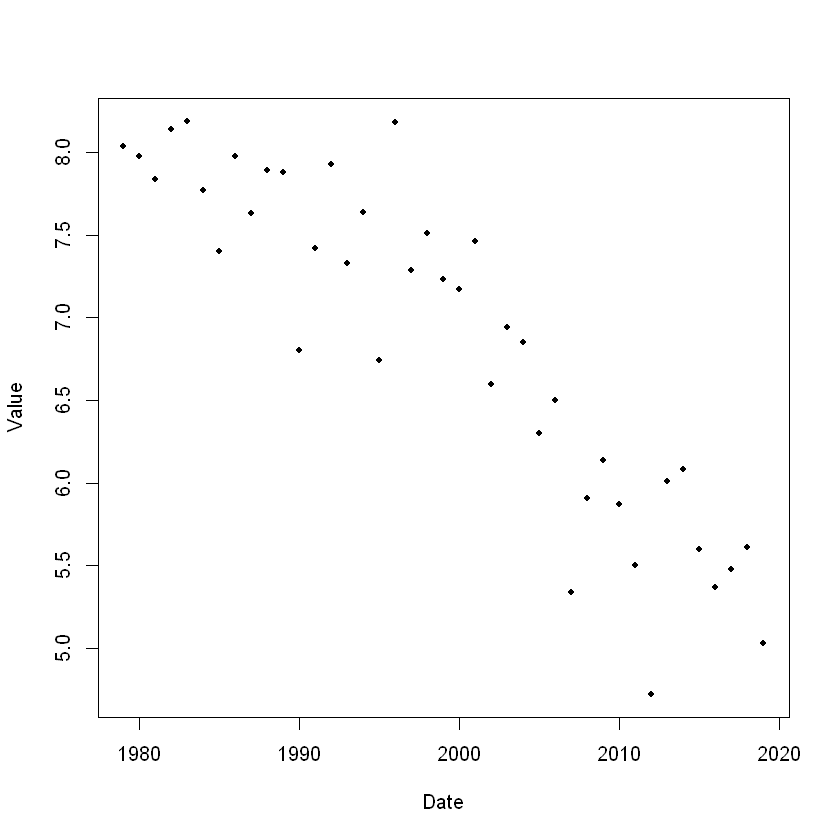

In [7]:
plot(Value ~ Date, pch = 20, data = seaice)


In [9]:
lm1 <- lm(Value ~ Date, data = seaice)
summary(lm1)


Call:
lm(formula = Value ~ Date, data = seaice)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15024 -0.26501 -0.00928  0.27689  1.09069 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 159.167815  11.664534   13.64  < 2e-16 ***
Date         -0.076192   0.005835  -13.06  8.1e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4421 on 39 degrees of freedom
Multiple R-squared:  0.8138,	Adjusted R-squared:  0.8091 
F-statistic: 170.5 on 1 and 39 DF,  p-value: 8.104e-16


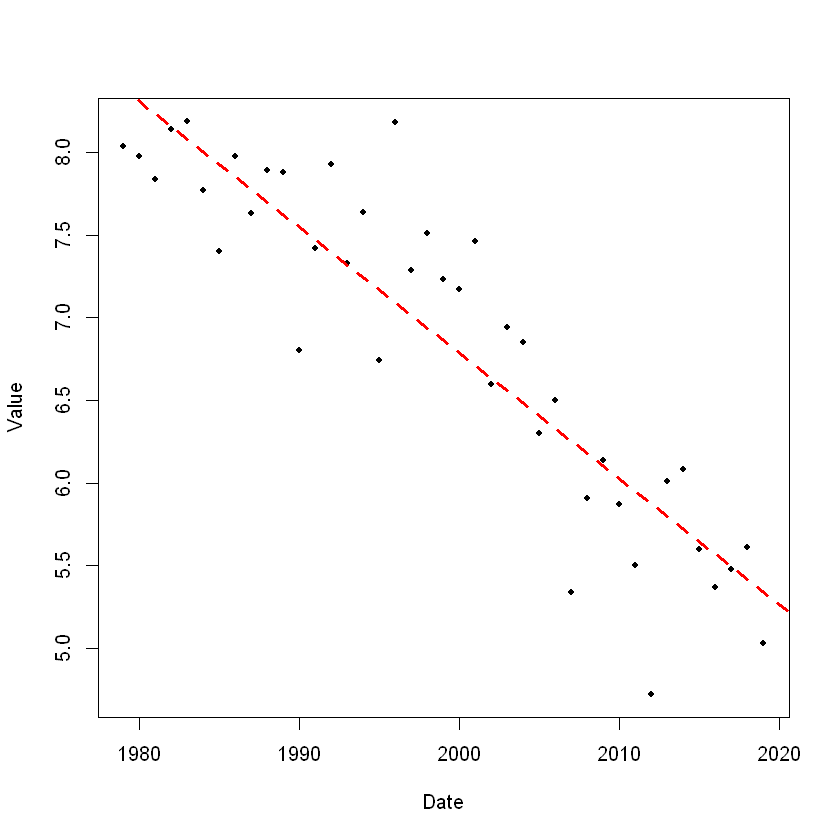

In [12]:
plot(Value ~ Date, pch = 20, data = seaice)
abline(lm1, col = 2, lty = 2, lw = 3)

In [13]:
x <- I(seaice$Date - 1978) # Independent variable - will be an equivalent of temperature, etc.
y <- seaice$Value # Dependent variable  - equivalent of buckwheat production
N <- length(seaice$Date) # Number of observations

In [17]:
lm1 <- lm(y ~ x)
summary(lm1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15024 -0.26501 -0.00928  0.27689  1.09069 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.460756   0.140648   60.16  < 2e-16 ***
x           -0.076192   0.005835  -13.06  8.1e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4421 on 39 degrees of freedom
Multiple R-squared:  0.8138,	Adjusted R-squared:  0.8091 
F-statistic: 170.5 on 1 and 39 DF,  p-value: 8.104e-16


In [19]:
(lm_alpha <- summary(lm1)$coeff[1])  # the intercept
(lm_beta <- summary(lm1)$coeff[2])  # the slope
(lm_sigma <- sigma(lm1))  # the residual error

[1] 8.460756

[1] -0.07619164

[1] 0.4420821

In [20]:
stan_data <- list(N = N, x = x, y = y)


In [22]:
library(rstan)
library(gdata)
library(bayesplot)

Warning message:
"package 'rstan' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.4.4"rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.
Warning message:
"package 'gdata' was built under R version 3.4.4"gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
g

ERROR: Error in library(bayesplot): there is no package called 'bayesplot'


In [23]:
write("// Stan model for simple linear regression

data {
 int < lower = 1 > N; // Sample size is an integer with the lowest value of 1 (i.e. positive)
 vector[N] x; // Predictor is a vector of the size of sample size
 vector[N] y; // Outcome is a vector of a size of sample size
}

parameters {
 real alpha; // Intercept is an unconstrained continous value
 real beta; // Slope (regression coefficients) is an unconstrained continous value
 real < lower = 0 > sigma; // Error SD is an unconstrained positive continous valeu
}

model {
 y ~ normal(alpha + x * beta , sigma); //this seem to declare the model
}
generated quantities {
} // The posterior predictive distribution",

"stan_model1.stan")

In [24]:
stanc("stan_model1.stan")


$status
[1] TRUE

$model_cppname
[1] "model4fa476daf76_stan_model1"

$cppcode
[1] "// Code generated by Stan version 2.18.1\n\n#include <stan/model/model_header.hpp>\n\nnamespace model4fa476daf76_stan_model1_namespace {\n\nusing std::istream;\nusing std::string;\nusing std::stringstream;\nusing std::vector;\nusing stan::io::dump;\nusing stan::math::lgamma;\nusing stan::model::prob_grad;\nusing namespace stan::math;\n\nstatic int current_statement_begin__;\n\nstan::io::program_reader prog_reader__() {\n    stan::io::program_reader reader;\n    reader.add_event(0, 0, \"start\", \"model4fa476daf76_stan_model1\");\n    reader.add_event(21, 19, \"end\", \"model4fa476daf76_stan_model1\");\n    return reader;\n}\n\nclass model4fa476daf76_stan_model1 : public prob_grad {\nprivate:\n    int N;\n    vector_d x;\n    vector_d y;\npublic:\n    model4fa476daf76_stan_model1(stan::io::var_context& context__,\n        std::ostream* pstream__ = 0)\n        : prob_grad(0) {\n        ctor_body(context__, 0, pstream__);\n    }\n\n    model4fa476daf76_stan_model1(stan::io::var_context& context__,\n        unsigned int random_seed__,\n        std::ostream* pstream__ = 0)\n        : prob_grad(0) {\n        ctor_body(context__, random_seed__, pstream__);\n    }\n\n    void ctor_body(stan::io::var_context& context__,\n                   unsigned int random_seed__,\n                   std::ostream* pstream__) {\n        typedef double local_scalar_t__;\n\n        boost::ecuyer1988 base_rng__ =\n          stan::services::util::create_rng(random_seed__, 0);\n        (void) base_rng__;  // suppress unused var warning\n\n        current_statement_begin__ = -1;\n\n        static const char* function__ = \"model4fa476daf76_stan_model1_namespace::model4fa476daf76_stan_model1\";\n        (void) function__;  // dummy to suppress unused var warning\n        size_t pos__;\n        (void) pos__;  // dummy to suppress unused var warning\n        std::vector<int> vals_i__;\n        std::vector<double> vals_r__;\n        local_scalar_t__ DUMMY_VAR__(std::numeric_limits<double>::quiet_NaN());\n        (void) DUMMY_VAR__;  // suppress unused var warning\n\n        // initialize member variables\n        try {\n            current_statement_begin__ = 4;\n            context__.validate_dims(\"data initialization\", \"N\", \"int\", context__.to_vec());\n            N = int(0);\n            vals_i__ = context__.vals_i(\"N\");\n            pos__ = 0;\n            N = vals_i__[pos__++];\n            current_statement_begin__ = 5;\n            validate_non_negative_index(\"x\", \"N\", N);\n            context__.validate_dims(\"data initialization\", \"x\", \"vector_d\", context__.to_vec(N));\n            validate_non_negative_index(\"x\", \"N\", N);\n            x = vector_d(static_cast<Eigen::VectorXd::Index>(N));\n            vals_r__ = context__.vals_r(\"x\");\n            pos__ = 0;\n            size_t x_i_vec_lim__ = N;\n            for (size_t i_vec__ = 0; i_vec__ < x_i_vec_lim__; ++i_vec__) {\n                x[i_vec__] = vals_r__[pos__++];\n            }\n            current_statement_begin__ = 6;\n            validate_non_negative_index(\"y\", \"N\", N);\n            context__.validate_dims(\"data initialization\", \"y\", \"vector_d\", context__.to_vec(N));\n            validate_non_negative_index(\"y\", \"N\", N);\n            y = vector_d(static_cast<Eigen::VectorXd::Index>(N));\n            vals_r__ = context__.vals_r(\"y\");\n            pos__ = 0;\n            size_t y_i_vec_lim__ = N;\n            for (size_t i_vec__ = 0; i_vec__ < y_i_vec_lim__; ++i_vec__) {\n                y[i_vec__] = vals_r__[pos__++];\n            }\n\n            // validate, data variables\n            current_statement_begin__ = 4;\n            check_greater_or_equal(function__,\"N\",N,1);\n            current_statement_begin__ = 5;\n            current_statement_begin__ = 6;\n            // initialize data variables\n\n\n            // validate transformed data\n\n            // valid

In [25]:
stan_model1 <- "stan_model1.stan"


In [26]:
fit <- stan(file = stan_model1, data = stan_data, warmup = 500, iter = 1000, chains = 4, cores = 2, thin = 1)

In [27]:
fit

Inference for Stan model: stan_model1.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean   sd  2.5%   25%   50%   75% 97.5% n_eff Rhat
alpha  8.47    0.01 0.15  8.16  8.37  8.47  8.57  8.77   883    1
beta  -0.08    0.00 0.01 -0.09 -0.08 -0.08 -0.07 -0.06   940    1
sigma  0.46    0.00 0.05  0.37  0.42  0.45  0.49  0.58   860    1
lp__  11.53    0.06 1.32  8.06 10.95 11.85 12.52 13.03   566    1

Samples were drawn using NUTS(diag_e) at Mon Sep 23 02:42:14 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [28]:
posterior <- extract(fit)
str(posterior)

List of 4
 $ alpha: num [1:2000(1d)] 8.63 8.41 8.63 8.49 8.7 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ beta : num [1:2000(1d)] -0.0765 -0.0767 -0.0846 -0.0688 -0.0863 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ sigma: num [1:2000(1d)] 0.487 0.452 0.496 0.545 0.468 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ lp__ : num [1:2000(1d)] 10.3 12.72 11.72 8.48 11.56 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL


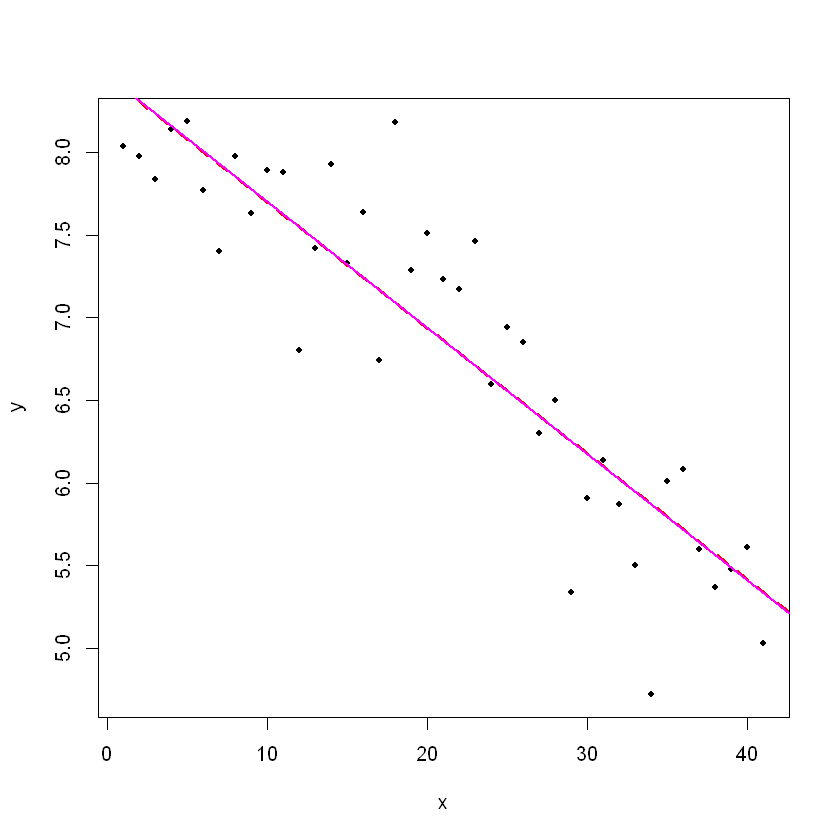

In [31]:
plot(y ~ x, pch = 20)

abline(lm1, col = 2, lty = 2, lw = 3)
abline( mean(posterior$alpha), mean(posterior$beta), col = 6, lw = 2)

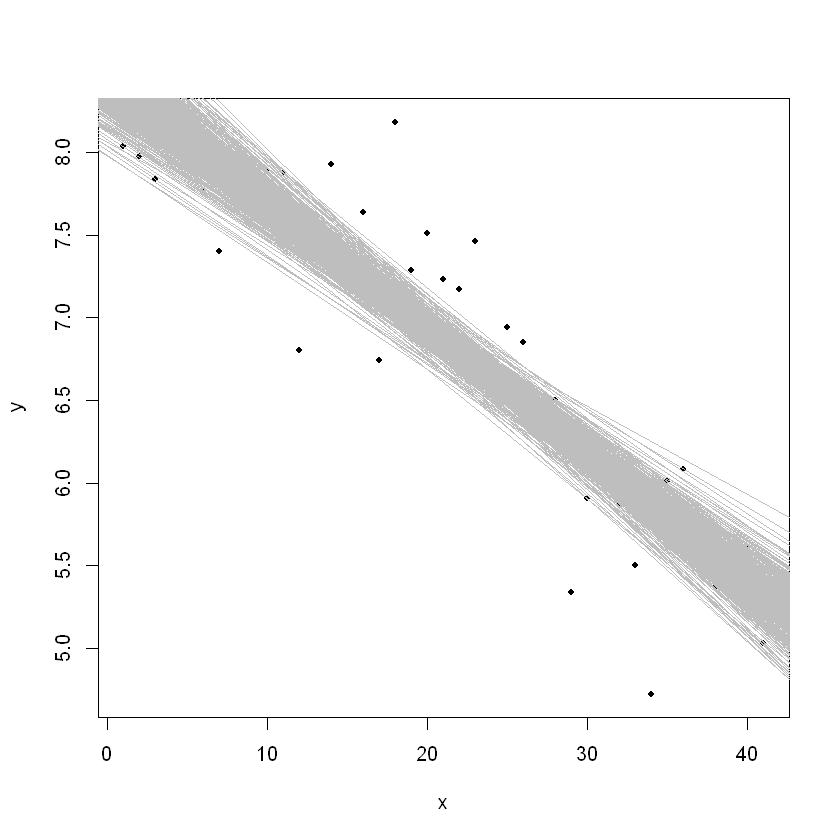

In [32]:
plot(y ~ x, pch = 20)

abline(lm1, col = 2, lty = 2, lw = 3)
abline( mean(posterior$alpha), mean(posterior$beta), col = 6, lw = 2)
for (i in 1:500) {
 abline(posterior$alpha[i], posterior$beta[i], col = "gray", lty = 1)
}

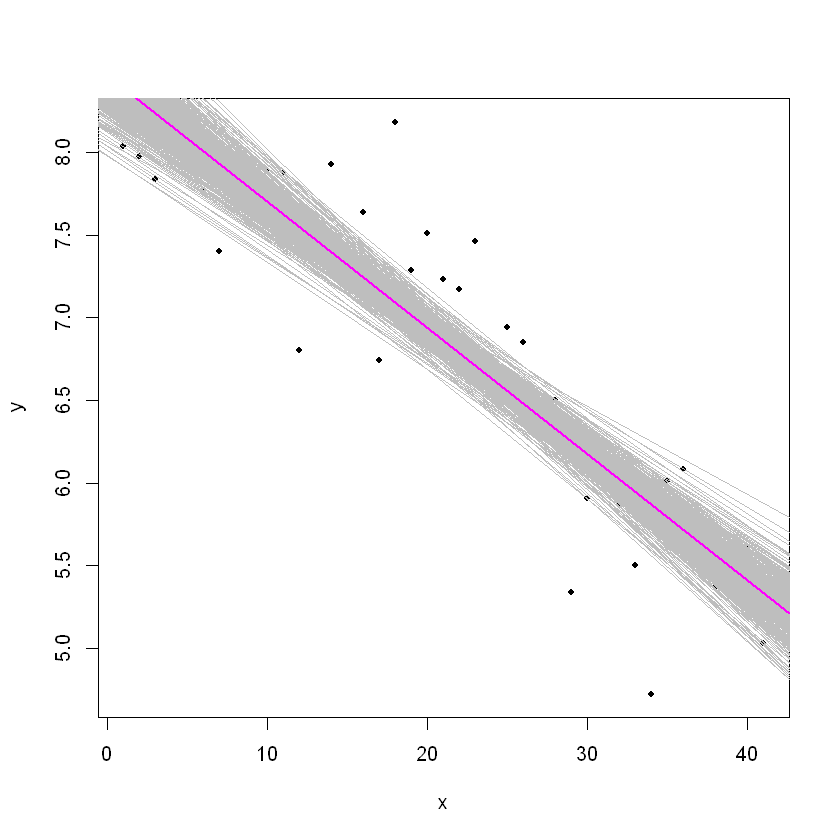

In [33]:
plot(y ~ x, pch = 20)

for (i in 1:500) {
 abline(posterior$alpha[i], posterior$beta[i], col = "gray", lty = 1)
}

abline(mean(posterior$alpha), mean(posterior$beta), col = 6, lw = 2)

In [ ]:
write("// Stan model for simple linear regression

data {
 int < lower = 1 > N; // Sample size
 vector[N] x; // Predictor
 vector[N] y; // Outcome
}

parameters {
 real alpha; // Intercept
 real beta; // Slope (regression coefficients)
 real < lower = 0 > sigma; // Error SD
}

model {
 alpha ~ normal(10, 0.1);
 beta ~ normal(1, 0.1);
 y ~ normal(alpha + x * beta , sigma);
}

generated quantities {}",

"stan_model2.stan")

stan_model2 <- "scripts/users/imyerssmith/CC-Stan-Part-1/stan_model2.stan"

In [ ]:
plot(posterior$alpha, type = "l")
plot(posterior$beta, type = "l")
plot(posterior$sigma, type = "l")